In [1]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_paths = glob('../dataset/mnist_png/training/0/*.png')
data_paths[0]

'../dataset/mnist_png/training/0\\1.png'

In [5]:
path = data_paths[0]
path

'../dataset/mnist_png/training/0\\1.png'

glob와 tf.io.matching_files 비슷.  
다른점은 tensor로 불러옴

In [6]:
data_paths = tf.io.matching_files('../dataset/mnist_png/training/0/*.png')
data_paths[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'..\\dataset\\mnist_png\\training\\0\\1.png'>

In [7]:
path = data_paths[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'..\\dataset\\mnist_png\\training\\0\\1.png'>

## Load Image

In [8]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile) # numpy로 변환
image.shape

TensorShape([28, 28, 1])

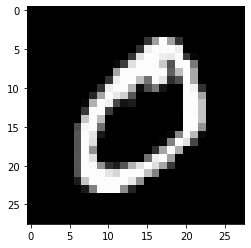

In [9]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

## Set Data Generator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [17]:
datagen = ImageDataGenerator( # 데이터로드(flow())부터 전처리까지, augmentation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [18]:
result = next(iter(datagen.flow(inputs))) # flow()를 해줘야함
result.shape

(1, 28, 28, 1)

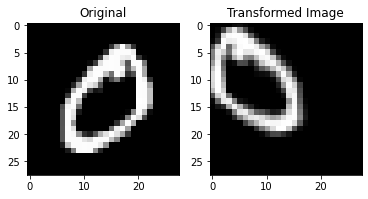

In [19]:
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(result), 'gray')
plt.show()

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 커스텀 함수 가능

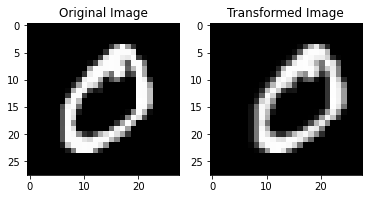

In [23]:
datagen = ImageDataGenerator(
    width_shift_range=0.3
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

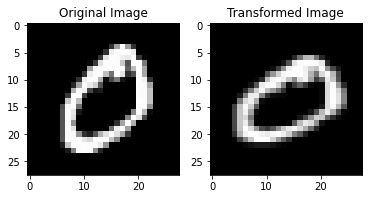

In [25]:
datagen = ImageDataGenerator(
    zoom_range=0.7 # 위아래 늘리거나 좌우를 늘리거나
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

## Rescale시 주의사항

train에서도 test에서도 해줘야함.

In [26]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)